# Random Forest y Gradient Boosting

## Carga de datos

**Clasificación**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/titanic_modified.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   MissingAge  891 non-null    int64  
 7   Spouse      891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])
y = df.Survived

classes = X.columns.values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=55)

In [3]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Regresión**

In [4]:
df_reg = pd.read_csv('data/USA_Housing.csv')
X_reg = df_reg.drop(columns=['Price','Address'])
y_reg = df_reg['Price']
df_reg.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."


In [5]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg,y_reg,
                                                                   test_size=0.2,
                                                                   random_state=55)

## Random Forest

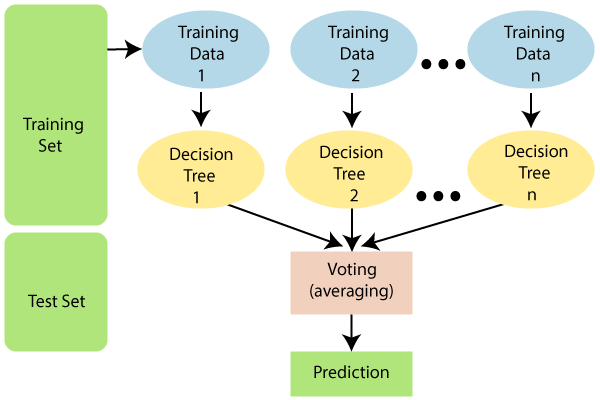

Demo: https://waternova.github.io/random-forest-viz/

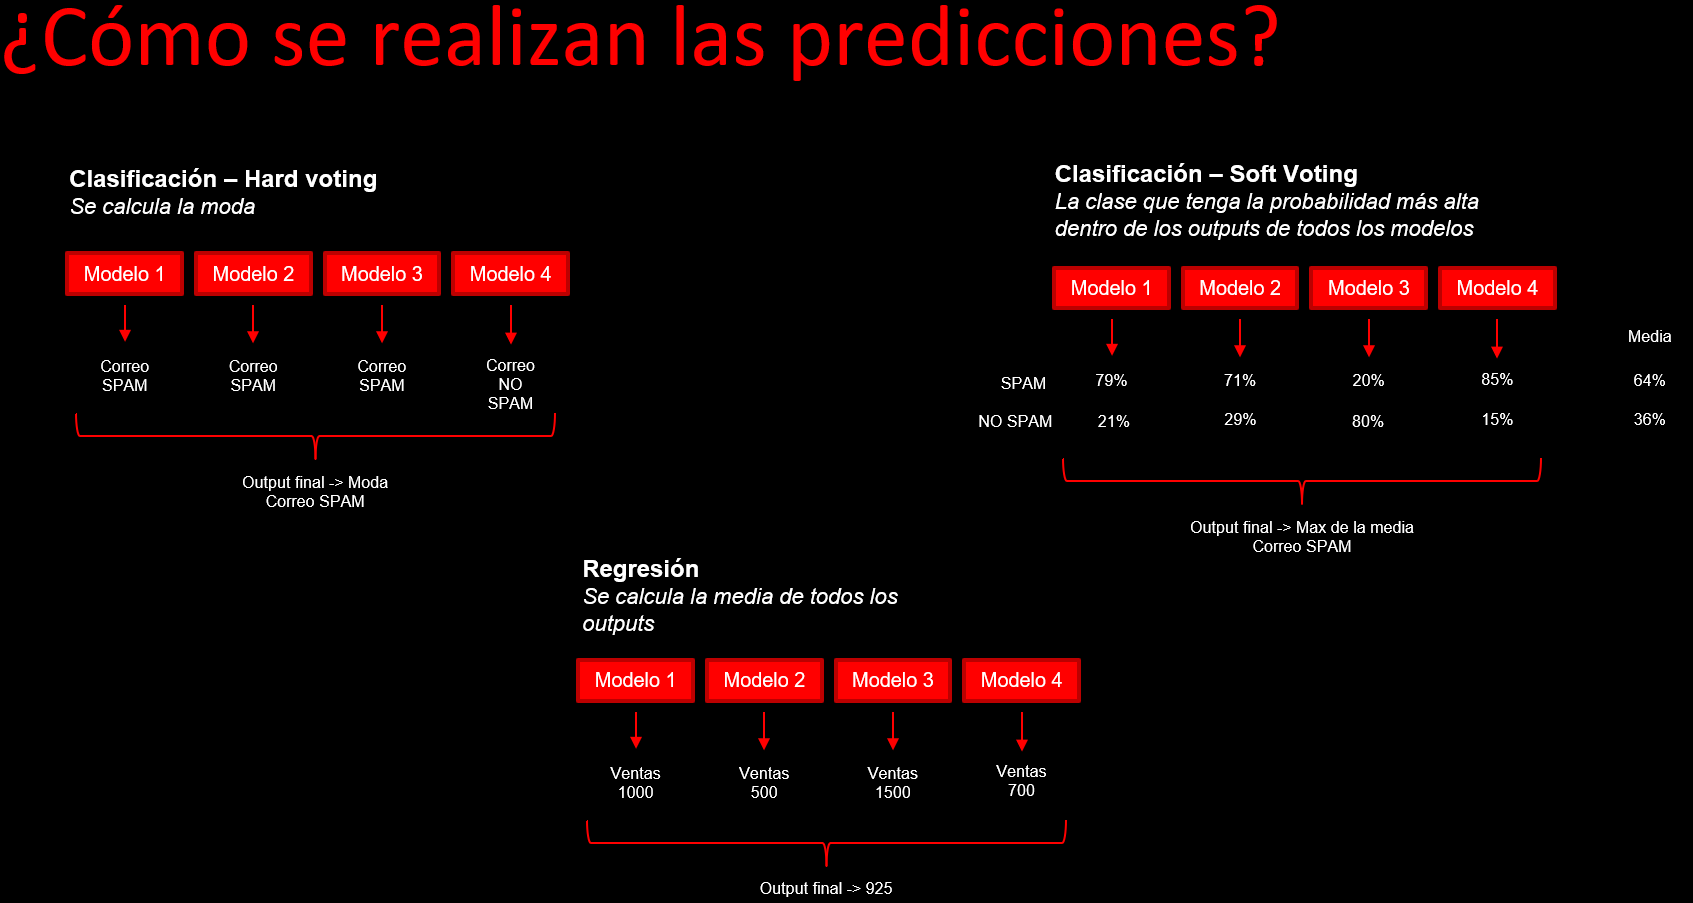

**RandomForestClassifier**

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=500,
                                max_depth=4,
                                random_state=42)

rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8044692737430168

Una característica interesante que tiene Random Forest es el **feature importance**. Nos da una medida de cuánto aporta cada feature a las predicciones. Se calcula para cada feature la aportación que ha hecho al gini o entropía. Para todos los árboles. Calculamos la media de la aportación de cada feature.

En cada split de los árboles se calcula el IG (Information Gained) teniendo en cuenta el índice Gini o la entropía antes y después del split. Se realiza una ponderación del IG en cada split

Por suerte sklearn ya realiza esta operación por nosotros, y lo normaliza a 1, de tal manera que las features más importantes estarán cercanas a 1 (el sumatorio de todas no es 1, no es un %).


In [7]:
rnd_clf.feature_importances_

array([0.23586492, 0.47903926, 0.12404398, 0.07216613, 0.06090722,
       0.01242875, 0.01554973])

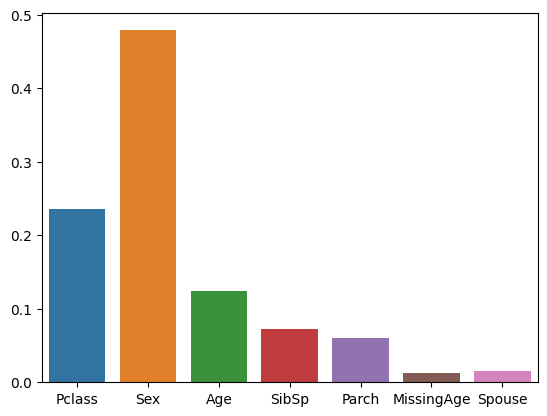

In [8]:
sns.barplot(x=classes, y=rnd_clf.feature_importances_);

Ejemplo de feature importance en imagenes

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(digits['data'], digits['target'])

RandomForestClassifier(random_state=42)

In [10]:
rnd_clf.feature_importances_

array([0.00000000e+00, 1.81900473e-03, 1.99728915e-02, 9.90172152e-03,
       8.48684382e-03, 1.96307336e-02, 9.82833225e-03, 6.92488002e-04,
       4.90522308e-05, 1.28849601e-02, 2.58820795e-02, 6.89960987e-03,
       1.48785063e-02, 3.11072526e-02, 5.16198888e-03, 8.52732163e-04,
       7.75908560e-05, 7.76780574e-03, 1.93986673e-02, 2.49720816e-02,
       2.92277284e-02, 4.89428505e-02, 8.96388010e-03, 2.58994323e-04,
       1.18876742e-04, 1.50060896e-02, 4.17088500e-02, 2.53734635e-02,
       3.18745568e-02, 2.25601509e-02, 2.74223431e-02, 0.00000000e+00,
       0.00000000e+00, 2.83816809e-02, 2.60008325e-02, 1.51251053e-02,
       4.60605191e-02, 1.80642898e-02, 2.49633401e-02, 0.00000000e+00,
       1.79805622e-05, 1.07898268e-02, 3.96182511e-02, 4.14284253e-02,
       2.11359129e-02, 2.01518229e-02, 2.14514264e-02, 3.66326878e-05,
       2.34739186e-05, 3.00542515e-03, 1.57675262e-02, 2.18603775e-02,
       1.34462701e-02, 2.58878946e-02, 2.77796276e-02, 1.70216214e-03,
      

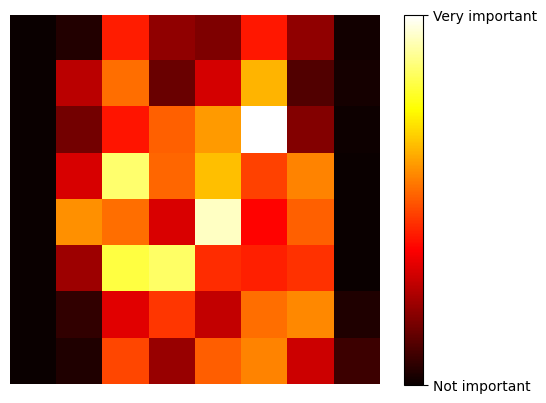

In [11]:
def plot_digit(data):
    image = data.reshape(8, 8)
    plt.imshow(image, cmap = plt.cm.hot,
               interpolation="nearest")
    plt.axis("off")
    
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

**¿Qué hiperparámetros debería tocar en el RandomForest?**
1. `n_estimators`: número de árboles que participarán en las votaciones. Cuantos más mejor. NO producen overfitting. Cuanto más complejo es el dataset, mejor vendrá que haya muchos árboles. Más de 200 suele ser redundante.
2. `max_depth`: profundida de los árboles. Cuanto más profundos, más complejo es el modelo, pero menos generaliza. De  nuevo, cuanto más complejo es el problema, mayor profundidad necesitaremos. No más de 20/30 es lo normal.
3. `max_features`: features a tener en cuenta en los splits del árbol. Cuanto más bajo, mejor generalizará y menos overfitting. Numero menor a la cantidad de features del dataset, sino dará error.
4. `min_samples_split`: mínima cantidad de muestras en un nodo antes de ser spliteado. 2 por defecto. Números bajos suelen dar buenos resultados (<50). Cuanto más alto, mejor generaliza, pero más baja la precisión.
5. `min_samples_leaf`: mínima cantidad de puntos permitidos en un `leaf node`, es decir, un nodo que no va a volver a ser spliteado. Valores bajos funcionan bien (<50).


**RandomForestRegressor**

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rnd_reg = RandomForestRegressor(n_estimators=500,
                               max_depth=5,
                               random_state=42)
rnd_reg.fit(X_train_reg, 
           y_train_reg)

y_pred_reg = rnd_reg.predict(X_test_reg)
mean_absolute_error(y_test_reg, y_pred_reg)

130675.24633852691

# Boosting algorithms

En esta técnica los modelos van intentando mejorar su predecesor, recibiendo los errores del mismo, e intentando mejorar su resultado

Estos algoritmos son de los más poderosos cuando trabajamos con datos tabulares

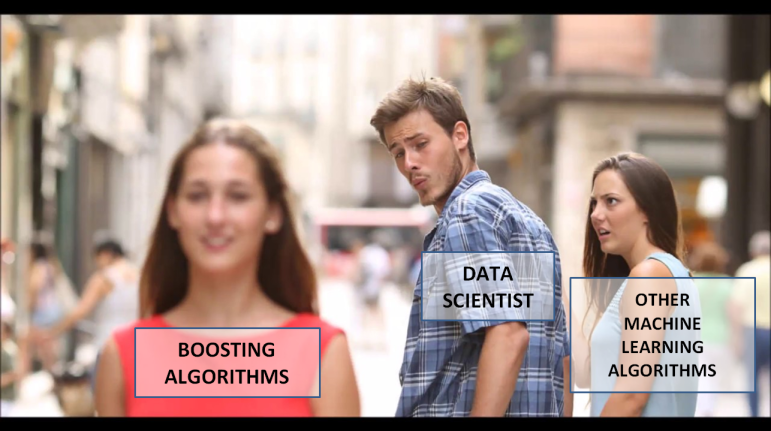

## AdaBoost

AdaBoost (adaptive boosting) consiste en crear varios predictores sencillos en secuencia, de tal manera que el segundo ajuste bien lo que el primero no ajustó, que el tercero ajuste un poco mejor lo que el segundo no pudo ajustar y así sucesivamente. 

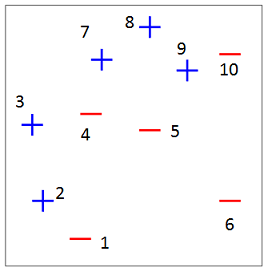
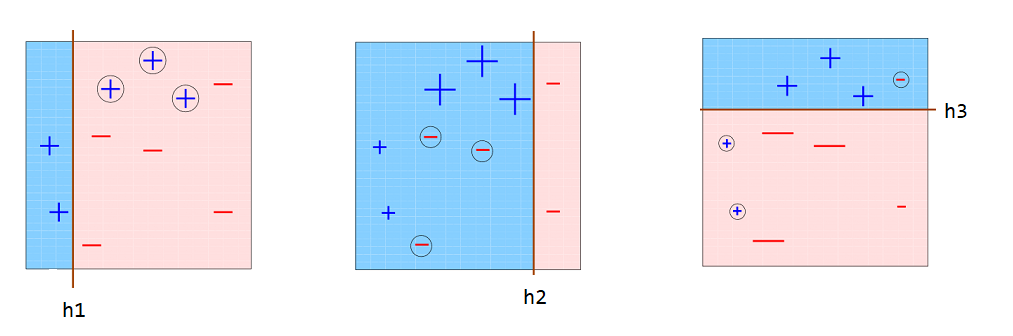
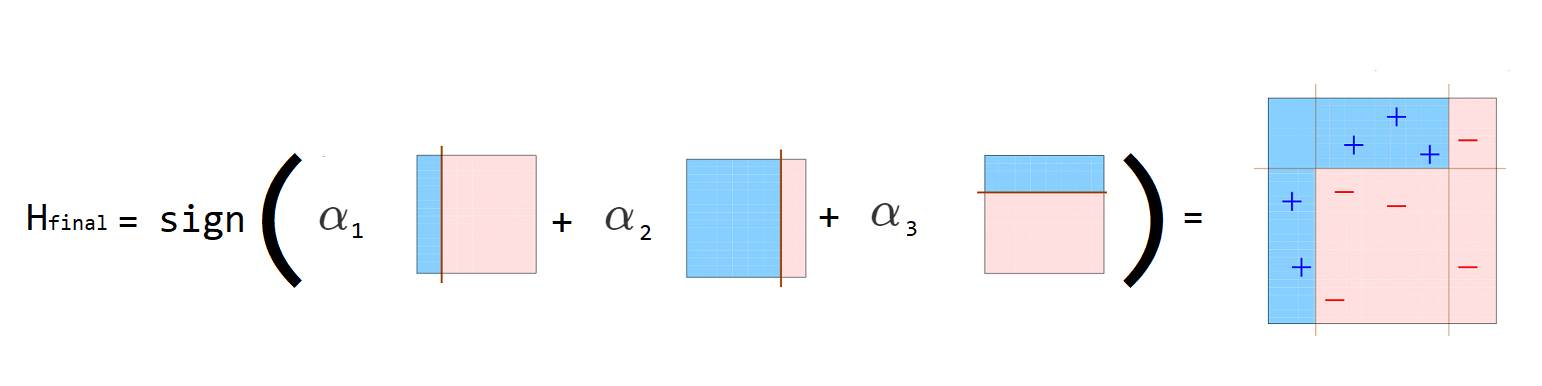

Más info: https://youtu.be/LsK-xG1cLYA

**AdaBoostClassifier**

In [13]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=200, random_state=42)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7988826815642458

También tenemos feature importance

<AxesSubplot: >

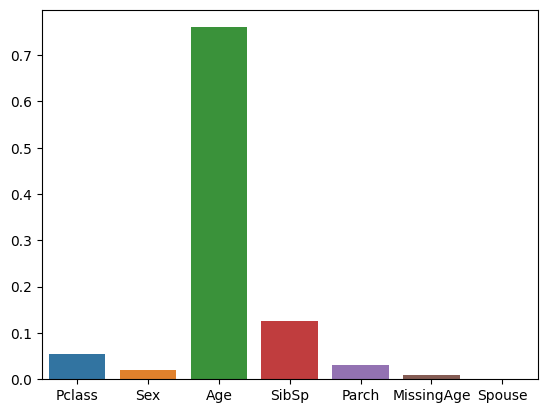

In [14]:
sns.barplot(x=classes, y=ada_clf.feature_importances_)

**¿Qué hiperparámetros debería tocar en el AdaBoostClassifier?**
1. `n_estimators`: número de árboles que participarán en la corrección secuencial del error del modelo. Si corregimos el error a la perfección el algoritmo termina de entrenar. Cuantos más estimadores, mejor corregiremos el error pero mayor probabilidad de caer en overfitting. Valores superiores a 100 suelen sobreajustar el modelo aunque dependerá de la complejidad y volumen de los datos.
2. `learning_rate`: no suele tener valores superiores a 1. Cuanto más alto, más aporta cada nuevo árbol, más preciso, pero caemos en overfitting. **Importante**: un learning rate bajo y alto número de estimadores no necesariamente tiene por qué aumentar la precisión y si va a inducir en altos costes computacionales.
3. `algorithm`: 'SAME' o 'SAME.R'. 'SAME.R' utiliza la probabilidad para actualizar los modelos aditivos, mientras que 'SAME' usa los valores de clasificación. Similar a soft vs hard voting. 'SAMME.R' converge antes que 'SAMME'
4. `base_estimator`: se suele dejar por defecto, aunque podría encajar un SVM o una RegresiónLogística
5. `max_depth`: **OJO**, no es un hiperparámetro del AdaBoostClassifier, sino del DecisionTreeClassifier. Habrá que probar varios árboles con diferentes `max_depth` y después ponerlos como `base_estimator` en el AdaBoost. Cuanto mayor es este hiperparámetro, más preciso, pero también más overfitting.

**AdaBoostRegressor**

In [15]:
from sklearn.ensemble import AdaBoostRegressor


ada_reg = AdaBoostRegressor(n_estimators=200,
                               random_state=42)
ada_reg.fit(X_train_reg, 
           y_train_reg)

y_pred_reg = ada_reg.predict(X_test_reg)
mean_absolute_error(y_test_reg, y_pred_reg)

100947.80757390938

## GradientBoosting

Al igual que el AdaBoost, el GradientBoost trabaja sobre un conjunto secuencial de modelos (árboles de decisión), tratando de corregir a su predecesor. Sin embargo, cuando el AdaBoost iba actualizando los pesos de cada observación, el GradientBoosting intenta ajustar y minimizar los errores (residuos) del modelo predecesor.

El modelo final será una combinación lineal de todos los estimadores.

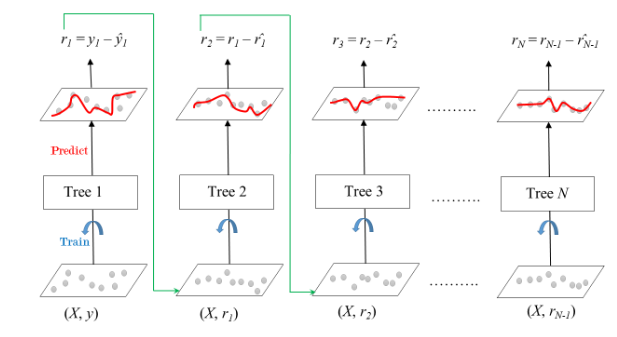

**GradientBoostingRegressor**

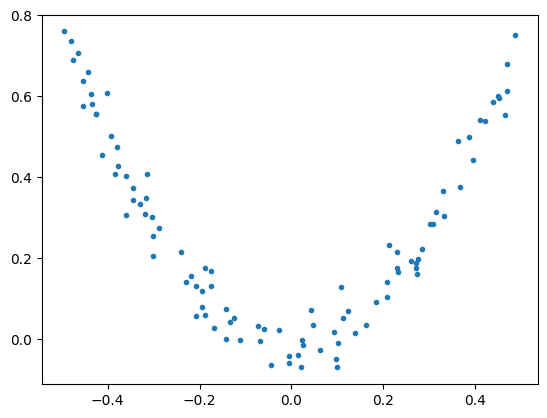

In [16]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
plt.plot(X,y,'.')

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2,
                                 random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [18]:
y2 = y - tree_reg1.predict(X)

In [19]:
tree_reg2 = DecisionTreeRegressor(max_depth=2,
                                 random_state=42)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [20]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2,
                                 random_state=42)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [21]:
X_new = np.array([[0.8]])
y_pred = sum([tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3)])

In [22]:
y_pred

array([0.75026781])

In [23]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

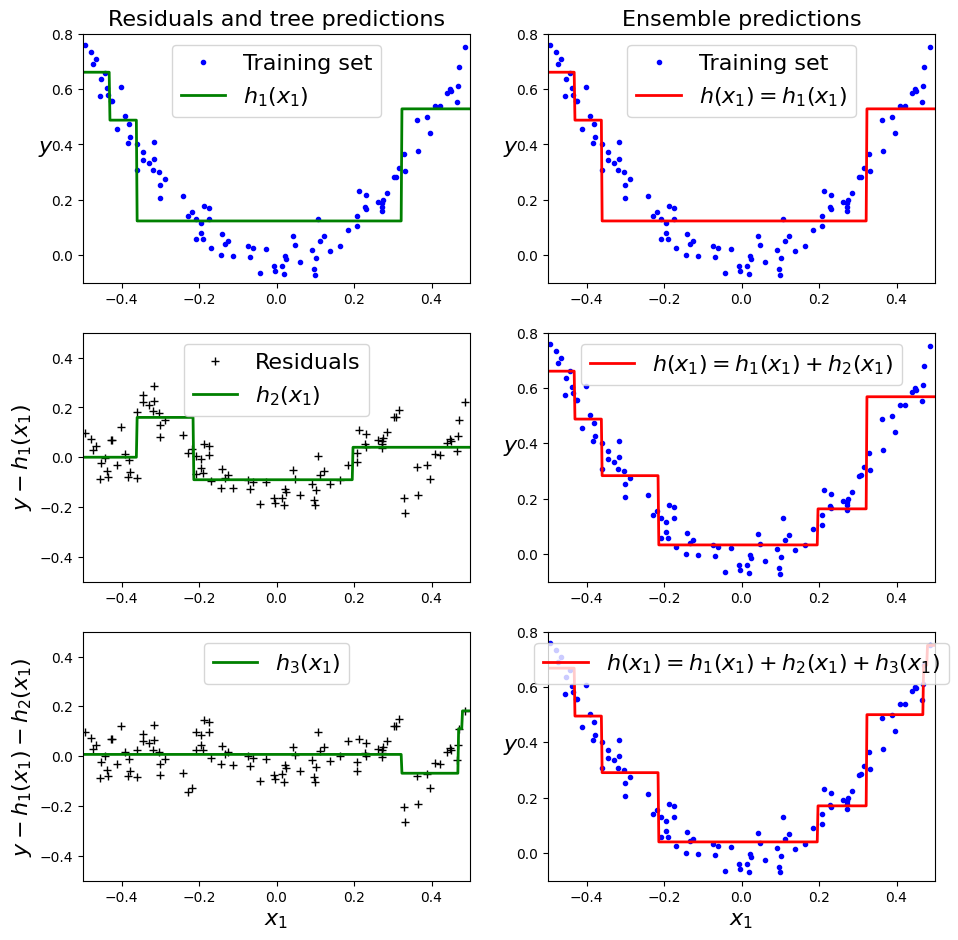

In [24]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor() 

gbr.fit(X_train_reg, y_train_reg)
y_pred = gbr.predict(X_test_reg)
mean_absolute_error(y_test_reg, y_pred)

85550.98776896916

**GradientBoostingClassifier**

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy_score(y_test,y_pred)

0.8156424581005587

**¿Qué hiperparámetros debería tocar en el GradientBoosting?**
1. `n_estimators`: número de árboles que participarán en la corrección secuencial del error del modelo. Si corregimos el error a la perfección el algoritmo termina de entrenar. Cuantos más estimadores, mejor corregiremos el error pero mayor probabilidad de caer en overfitting. Valores superiores a 100 suelen sobreajustar el modelo aunque dependerá de la complejidad y volumen de los datos.
2. `learning_rate`: no suele tener valores superiores a 1. Cuanto más alto, más aporta cada nuevo árbol, más preciso, pero caemos en overfitting. **Importante**: un learning rate bajo y alto número de estimadores no necesariamente tiene por qué aumentar la precisión y si va a inducir en altos costes computacionales.
3. `max_depth`: Cuanto mayor es este hyperparámetro, más preciso, pero también más overfitting.



## XGBoost
[XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) (exTreme Gradient Boosting) es un algoritmo que se enfoca en la velocidad de computación y el desempeño del modelo. 


XGBoost permite regularizar el modelo y puede manejar missings, por lo que no es necesario tener el dataset perfectamente limpio

In [27]:
#!pip install xgboost

**XGBRegressor**




In [28]:
import xgboost

xgb_reg = xgboost.XGBRFRegressor(random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)
y_pred = xgb_reg.predict(X_test_reg)
mean_absolute_error(y_test_reg, y_pred)

118545.96230303324

**XGBClassifier**

In [29]:
xgb_clas = xgboost.XGBClassifier(random_state=42)

xgb_clas.fit(X_train, y_train)
y_pred = xgb_clas.predict(X_test)
accuracy_score(y_test, y_pred)

0.8156424581005587

**¿Qué hiperparámetros debería tocar en el XGB?**
1. `n_estimators`: igual que para el GradientBoosting.
2. `learning_rate`: o también llamado `eta`. Como el learning rate del GradientBoosting.
3. `max_depth`: nada nuevo
4. `min_child_weight`: limita la profundidad del árbol
5. `subsample`: muestreo del dataset para cada árbol
6. `colsample_bytree`: fracción del total de variables por árbol 

Si quieres afinar más todavía el XGBoost consulta [esta completa guía](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/).

## LightGBM

Similar a XgBoost, desarrollado por Microsoft, es ligeramente más rápido.

In [30]:
#!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 21.6 MB/s eta 0:00:00


**LGBMRegressor**

In [31]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

lgbm_reg = LGBMRegressor(random_state=42)

lgbm_reg.fit(X_train_reg, y_train_reg)

y_pred = lgbm_reg.predict(X_test_reg)

mean_absolute_error(y_test_reg, y_pred)

87803.38881114805

**LGBMClassifier**

In [35]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm_clas = LGBMClassifier(random_state=42)

lgbm_clas.fit(X_train, y_train)

y_pred = lgbm_clas.predict(X_test)

accuracy_score(y_test, y_pred)

0.8156424581005587



**¿Qué hiperparámetros debería tocar en el LightGBM?**
1. `max_depth` – Similar to XGBoost, this parameter instructs the trees to not grow beyond the specified depth. A higher value increases the chances for the model to overfit.
2. `num_leaves` – This parameter is very important in terms of controlling the complexity of the tree. The value should be less than 2^(max_depth) as a leaf-wise tree is much deeper than a depth-wise tree for a set number of leaves. Hence, a higher value can induce overfitting.
3. `min_data_in_leaf` – The parameter is used for controlling overfitting. A higher value can stop the tree from growing too deep but can also lead the algorithm to learn less (underfitting). According to the LightGBM’s official documentation, as a best practice, it should be set to the order of hundreds or thousands.
4. `feature_fraction` – Similar to colsample_bytree in XGBoost
5. `bagging_fraction` – Similar to subsample in XGBoost

## Catboost

Su nombre combina *Category* y *Boosting*, y funciona bien cuando tenemos muchas variables categóricas (de hecho, [las admite como inputs](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)) y texto. 

In [33]:
#!pip install catboost

     --------------------------------------- 73.9/73.9 MB 27.3 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00


In [34]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
X = df.drop(columns=['price'])

y = df.price

In [37]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.2,
                                                       random_state=1)

In [42]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error

cb = CatBoostRegressor(n_estimators=200,
                      loss_function='RMSE',
                      learning_rate=0.4,
                      random_state=1
                       # verbose=False
                      )

pool_train = Pool(X_train2, y_train2,
                 cat_features=['cut', 'color', 'clarity'])
pool_test = Pool(X_test2, 
                 cat_features=['cut', 'color', 'clarity'])

cb.fit(pool_train)

y_pred = cb.predict(pool_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test2, y_pred)))

0:	learn: 2692.1178088	total: 36.7ms	remaining: 7.3s
1:	learn: 1983.3697029	total: 71.9ms	remaining: 7.12s
2:	learn: 1524.9370686	total: 109ms	remaining: 7.14s
3:	learn: 1195.4857521	total: 146ms	remaining: 7.17s
4:	learn: 1010.7287024	total: 179ms	remaining: 6.99s
5:	learn: 908.2528476	total: 214ms	remaining: 6.93s
6:	learn: 812.3966093	total: 244ms	remaining: 6.73s
7:	learn: 762.6011214	total: 278ms	remaining: 6.67s
8:	learn: 733.6146969	total: 312ms	remaining: 6.63s
9:	learn: 706.8841148	total: 348ms	remaining: 6.61s
10:	learn: 689.4235577	total: 378ms	remaining: 6.49s
11:	learn: 675.4050909	total: 410ms	remaining: 6.42s
12:	learn: 669.8291911	total: 446ms	remaining: 6.41s
13:	learn: 661.9719485	total: 479ms	remaining: 6.36s
14:	learn: 654.6709801	total: 515ms	remaining: 6.35s
15:	learn: 644.5909246	total: 544ms	remaining: 6.26s
16:	learn: 639.7365023	total: 579ms	remaining: 6.24s
17:	learn: 635.2476165	total: 624ms	remaining: 6.31s
18:	learn: 626.0114884	total: 654ms	remaining: 6.2

155:	learn: 477.7899844	total: 5.97s	remaining: 1.68s
156:	learn: 477.5085236	total: 6.01s	remaining: 1.65s
157:	learn: 476.7357875	total: 6.05s	remaining: 1.61s
158:	learn: 476.6169916	total: 6.08s	remaining: 1.57s
159:	learn: 476.2952170	total: 6.12s	remaining: 1.53s
160:	learn: 475.8847366	total: 6.15s	remaining: 1.49s
161:	learn: 475.6164577	total: 6.18s	remaining: 1.45s
162:	learn: 474.7651372	total: 6.22s	remaining: 1.41s
163:	learn: 474.7140077	total: 6.25s	remaining: 1.37s
164:	learn: 474.2851909	total: 6.28s	remaining: 1.33s
165:	learn: 474.1428267	total: 6.31s	remaining: 1.29s
166:	learn: 473.3233152	total: 6.35s	remaining: 1.25s
167:	learn: 473.2628070	total: 6.38s	remaining: 1.22s
168:	learn: 472.8176365	total: 6.42s	remaining: 1.18s
169:	learn: 472.5611050	total: 6.45s	remaining: 1.14s
170:	learn: 472.2002262	total: 6.49s	remaining: 1.1s
171:	learn: 472.1886365	total: 6.52s	remaining: 1.06s
172:	learn: 471.9350781	total: 6.56s	remaining: 1.02s
173:	learn: 471.3429664	total

Con LightGBM también podemos utilizar variables categóricas, cambiando el tipo de estas columnas a `category`

In [44]:
lgbm = LGBMRegressor(n_estimators=200,
                    max_depth=3,
                     objetive='mse',
                     learning_rate=0.4
                    )

In [45]:
for col in X.select_dtypes(include=['object']):
    X[col] = X[col].astype('category')
    
X.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
x           float64
y           float64
z           float64
dtype: object

In [55]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.2,
                                                       random_state=1)

In [56]:
lgbm = LGBMRegressor(n_estimators=200,
                    max_depth=3,
                    objective='mse',
                     learning_rate=0.4
                    )
lgbm.fit(X_train2, y_train2)

y_pred = lgbm.predict(X_test2)
print('RMSE:', np.sqrt(mean_squared_error(y_test2,y_pred)))

RMSE: 558.9911419707183


### Hyperparameter tunning
Con todos los algoritmos vistos en este notebook, es posible aplicar la optimización de hiperparámetros, utilizando las técnicas que vimos anteriormente

In [50]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

params = {'max_depth': [3, 6, 10, 15],
          'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'colsample_bytree': np.arange(0.5, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
          'n_estimators': [100, 250, 500, 750],
          }

xgb = xgboost.XGBRegressor()

clf = RandomizedSearchCV(estimator=xgb,
                        cv=4,
                        n_iter=100,
                        param_distributions=params,
                         scoring='neg_mean_squared_error'
                        )

clf.fit(X_train_reg,y_train_reg)

RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=100,
                   param_distributions={'colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                          0.4],
                                        'max_depth': [3, 6, 10, 15],
                                        'n_estimators': [100, 250, 500, 750],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error')

In [51]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [52]:
clf.best_params_

{'subsample': 0.7,
 'n_estimators': 250,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.5}

In [53]:
y_pred = clf.predict(X_test_reg)
mean_absolute_error(y_test_reg, y_pred)

85046.41702133584

**Lecturas recomendadas**:

[When to Choose CatBoost Over XGBoost or LightGBM](https://neptune.ai/blog/when-to-choose-catboost-over-xgboost-or-lightgbm)

[XGBoost vs LightGBM: How Are They Different](https://neptune.ai/blog/xgboost-vs-lightgbm)

[XGBoost: Everything You Need to Know](https://neptune.ai/blog/xgboost-everything-you-need-to-know)

[Understanding LightGBM Parameters (and How to Tune Them)](https://neptune.ai/blog/lightgbm-parameters-guide)